## Survial analysis

In [9]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

### The Survial analysis
It s the way to describle how long things last.

#### S(t)=1-CDF(t)
where CDF(t) is the probability of a lifetime less than or euqal to t

In [12]:
import nsfg 

preg = nsfg.ReadFemPreg()
complete = preg.query('outcome in [1,3,4]').prglngth
cdf = thinkstats2.Cdf(complete, label='cdf')

In [13]:
import survival

def MakeSurvivalFromCdf(cdf, label=''):
    
    ts = cdf.xs
    ss = 1 - cdf.ps
    return survival.SurvivalFunction(ts, ss, label)

In [14]:
sf = MakeSurvivalFromCdf(cdf, label='survival')

In [15]:
print(cdf[13])
print(sf[13])

0.1397801412101171
0.8602198587898829


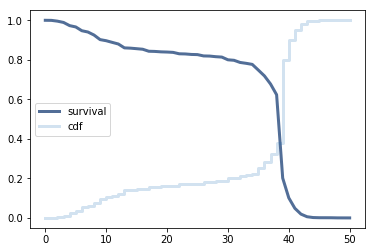

In [16]:
thinkplot.Plot(sf)
thinkplot.Plot(cdf, alpha=0.2)
thinkplot.Config(loc='center left')

##### Hazard Function
For pregnancy lengths the hazard function maps from a time, t, to the fraction of pregnancies that continue until t and then end at t

In [20]:
hf = sf.MakeHazardFunction(label='hazard')
print(hf[39]) 
print(hf[40]) #about 50% of pregnancies end in week 39
print(hf[43])
print(hf[10])

0.6767068273092369
0.49689440993788797
0.6883720930232536
0.006241949866243935


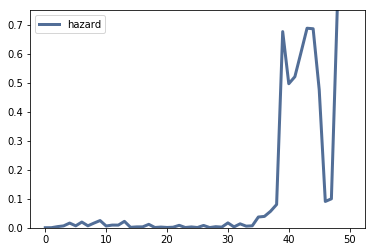

In [19]:
thinkplot.Plot(hf)
thinkplot.Config(ylim=[0,0.75], loc='upper left')

#### Kaplan-Meier Estimation

In [34]:
resp6 = nsfg.ReadFemResp()

In [22]:
resp6

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667
5,845,1,5,4,1,5.0,42,42,727,42,...,0,2335.279149,3725.796795,4705.681352,2,18,1234,1222,17:10:13,95.488000
6,10333,5,5,3,1,5.0,17,17,1029,17,...,0,2335.279149,2687.399758,3139.151658,2,18,1236,1224,14:14:38,61.204333
7,855,5,5,4,5,5.0,22,22,965,22,...,0,4670.558298,7122.614751,10019.382170,2,18,1235,1223,14:42:52,59.756333
8,8656,5,5,4,1,5.0,38,38,780,38,...,0,5198.652195,6027.568848,6520.021223,2,18,1237,1225,15:32:34,56.978833
9,3566,5,5,4,5,5.0,21,21,974,21,...,0,2764.142038,3240.986558,4559.095792,2,18,1231,1219,16:22:25,104.744667


In [31]:
resp6.cmmarrhx

0          NaN
1        974.0
2        910.0
3          NaN
4          NaN
5        937.0
6          NaN
7          NaN
8       1003.0
9          NaN
10       953.0
11      1223.0
12      1228.0
13      1015.0
14      1071.0
15         NaN
16      1154.0
17      1192.0
18         NaN
19      1140.0
20         NaN
21      1067.0
22      1031.0
23      1075.0
24      1106.0
25         NaN
26         NaN
27      1064.0
28       997.0
29      1157.0
         ...  
7613       NaN
7614    1221.0
7615       NaN
7616    1094.0
7617    1207.0
7618    1128.0
7619    1144.0
7620    1204.0
7621       NaN
7622       NaN
7623       NaN
7624    1062.0
7625       NaN
7626       NaN
7627       NaN
7628       NaN
7629    1049.0
7630    1142.0
7631       NaN
7632    1056.0
7633    1054.0
7634    1057.0
7635    1069.0
7636     953.0
7637    1060.0
7638    1032.0
7639       NaN
7640       NaN
7641       NaN
7642       NaN
Name: cmmarrhx, Length: 7643, dtype: float64

In [41]:
resp6.cmmarrhx.replace([9997, 9998, 9999], np.nan, inplace=True)
resp6['agemarry'] = (resp6.cmmarrhx - resp6.cmbirth)/12
resp6['age'] = (resp6.cmintvw - resp6.cmbirth)/12.0

In [42]:
complete = resp6[resp6.evrmarry==1].agemarry.dropna()
ongoing = resp6[resp6.evrmarry==0].age

In [48]:
from collections import Counter

def EstimateHazardFunction(complete, ongoing, label='', verbose=False):
    
    if np.sum(np.isnan(complete)):
        raise ValueError("complete contains NaNs")
    if np.sum(np.isnan(ongoing)):
        raise ValueError("ongoing contains NaNs")
        
    hist_complete = Counter(complete)
    hist_ongoing = Counter(ongoing)
    
    ts = list(hist_complete|hist_ongoing)
    ts.sort()
    
    at_risk = len(complete) + len(ongoing)
    
    lams = pd.Series(index=ts)
    for t in ts:
        ended = hist_complete[t]
        censored = hist_ongoing[t]
        
        lams[t] = ended/at_risk
        if verbose:
            print(t, at_risk, ended, censored, lams[t])
        at_risk -= ended + censored
        
    return survival.HazardFunction(lams, label=label)

No handles with labels found to put in legend.


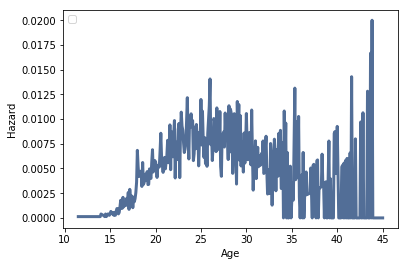

In [49]:
hf = EstimateHazardFunction(complete, ongoing)
thinkplot.Plot(hf)
thinkplot.Config(xlabel='Age', ylabel='Hazard')

No handles with labels found to put in legend.


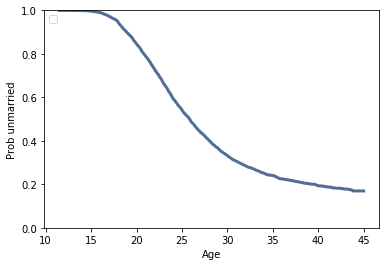

In [50]:
sf = hf.MakeSurvival()
thinkplot.Plot(sf)
thinkplot.Config(xlabel='Age', ylabel='Prob unmarried', ylim=[0,1])

### Quantifying uncertainty

In [58]:
def EstimateMarriageSurvival(resp):
    
    complete = resp[resp.evrmarry == 1].agemarry.dropna()
    ongoing = resp[resp.evrmarry == 0].age
    
    hf = EstimateHazardFunction(complete, ongoing)
    sf = hf.MakeSurvival()
    
    return hf, sf

In [63]:
def ResampleSurvival(resp, iters = 101):
    
    _, sf = EstimateMarriageSurvival(resp)
    thinkplot.Plot(sf)
    
    low, high = resp.agemarry.min(), resp.agemarry.max()
    ts = np.arange(low, high, 1/12.0)
    
    ss_seq = []
    for _ in range(iters):
        sample = thinkstats2.ResampleRowsWeighted(resp)
        _, sf = EstimateMarriageSurvival(sample)
        ss_seq.append(sf.Probs(ts))
        
    low, high = thinkstats2.PercentileRows(ss_seq, [5,95])
    thinkplot.FillBetween(ts, low, high, color='gray', label='90% CI')

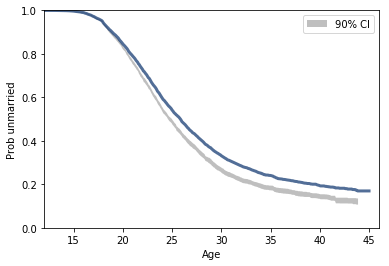

In [64]:
ResampleSurvival(resp6)
thinkplot.Config(xlabel='Age', ylabel='Prob unmarried',
                xlim=[12,46], ylim=[0,1], loc='upper right')

### More Data

In [67]:
resp5 = survival.ReadFemResp1995()
resp6 = survival.ReadFemResp2002()
resp7 = survival.ReadFemResp2010()

In [68]:
resps = [resp5, resp6, resp7]

In [74]:
def AddLabelsByDecade(groups, **options):
    
    thinkplot.PrePlot(len(groups))
    for name, _ in groups:
        label = '%d0s' % name
        thinkplot.Plot([15],[1], label=label, **options)
        
def EstimateMarriageSurvivalByDecade(groups, **options):
    
    thinkplot.PrePlot(len(groups))
    for _, group in groups:
        _, sf = EstimateMarriageSurvival(group)
        thinkplot.Plot(sf, **options)
        
def PlotResampledByDecade(resps, iters=11, predict_flag=False, omit=None):
    
    for i in range(iters):
        samples = [thinkstats2.ResampleRowsWeighted(resp)
                  for resp in resps]
        sample = pd.concat(samples, ignore_index=True)
        groups = sample.groupby('decade')
        
        if omit:
            groups = [(name, group) for name, group in groups if name not in omit]
            
        if i == 0:
            AddLabelsByDecade(groups, alpha=0.7)
            
        if predict_flag:
            PlotPredictionsByDecade(groups, alpha=0.1)
            EstimateMarriageSurvivalByDecade(groups, alpha=0.1)
        else:
            EstimateMarriageSurvivalByDecade(groups, alpha=0.2)

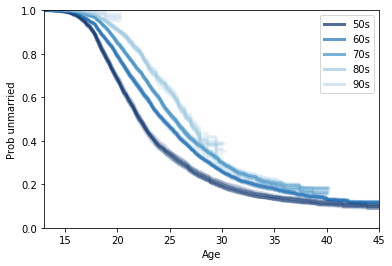

In [75]:
PlotResampledByDecade(resps)
thinkplot.Config(xlabel='Age', ylabel='Prob unmarried', xlim=[13,45], ylim=[0,1])

In [78]:
def PlotPredictionsByDecade(groups, **options):
    
    hfs = []
    for _, group in groups:
        hf, sf = EstimateMarriageSurvival(group)
        hfs.append(hf)
        
    thinkplot.PrePlot(len(hfs))
    for i, hf in enumerate(hfs):
        if i > 0:
            hf.Extend(hfs[i-1])
        sf = hf.MakeSurvival()
        thinkplot.Plot(sf, **options)

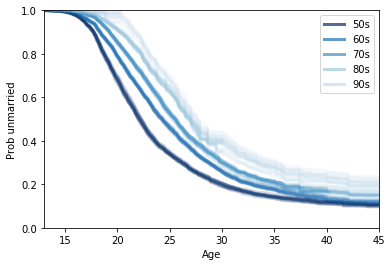

In [79]:
PlotResampledByDecade(resps, predict_flag=True)
thinkplot.Config(xlabel='Age', ylabel='Prob unmarried', xlim=[13,45], ylim=[0,1])

### Remaining lifetime

In [80]:
preg = nsfg.ReadFemPreg()

complete = preg.query('outcome in [1,3,4]').prglngth
print('Number of complete pregnancies', len(complete))
ongoing = preg[preg.outcome == 6].prglngth
print('Number of ongoing pregnancies', len(ongoing))

hf = EstimateHazardFunction(complete, ongoing)
sf1 = hf.MakeSurvival()

Number of complete pregnancies 11189
Number of ongoing pregnancies 352


No handles with labels found to put in legend.


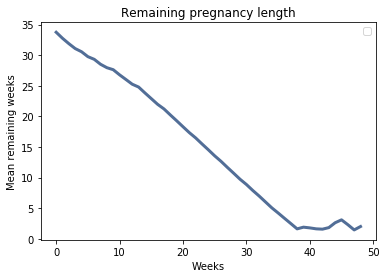

In [82]:
rem_life1 = sf1.RemainingLifetime()
thinkplot.Plot(rem_life1)
thinkplot.Config(title = 'Remaining pregnancy length', 
                xlabel='Weeks', ylabel='Mean remaining weeks')

In [83]:
hf, sf2 = EstimateMarriageSurvival(resp6)

No handles with labels found to put in legend.


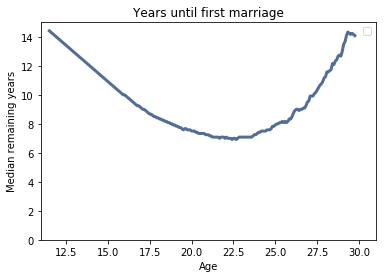

In [85]:
func = lambda pmf: pmf.Percentile(50)
rem_life2 = sf2.RemainingLifetime(filler=np.inf, func=func)

thinkplot.Plot(rem_life2)
thinkplot.Config(title='Years until first marriage',
                ylim=[0,15], xlim=[11,31], xlabel='Age', ylabel='Median remaining years')